# The shotlist d3d_clear_100.txt contains some bad shots.

The D3D logbook https://nomos.gat.com/DIII-D/apps/logbook/index.php describes them as being bad.
Here we shortly plot them and verify that the data is garbage.

In [1]:
from os.path import join
import h5py
import matplotlib.pyplot as plt

import sys
sys.path.append("/home/rkube/repos/frnn-loader")
from frnn_loader.primitives.signal import signal_0d

In [12]:
root = "/projects/FRNN/frnn_loader/D3D"

bad_shot_list = [167515,  # labelled clear
                 167548,  # labelled clear
                 168439,  # labelled clear
                 168440,  # labelled clear
                 168441,  # labelled clear
                 168442,  # labelled disruptive
                 168443,  # labelled disruptive
                 168444,  # labelled clear
                 168450,  # labelled clear
                 168483,  # labelled disruptive
                 168484,  # labelled clear
                 168485,  # labelled disruptive
                 168486,  # labelled disruptive
                 168487,  # labelled clear
                 168488,  # labelled clear
                 168490,  # labelled clear
                 168491,  # labelled clear
                 168500   # labelled clear
                ]

In [13]:
signal_ip = signal_0d("ipspr15V")
print(signal_ip.info)

{'Machine': 'D3D', 'Description': 'Plasma Current', 'PTData': 'ipspr15V', 'LocalPath': 'ipspr15V', 'ndim': 0, 'Channels': 1}


167515
167548
168439
168440
168441
168442
168443
168444
168450
168483
168484
168485
168486
168487
168488
168490
168491
168500


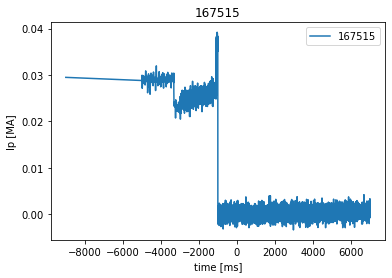

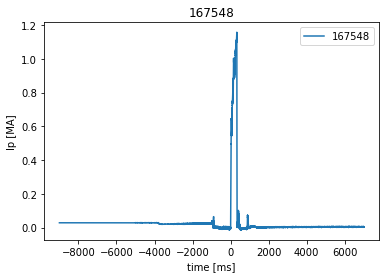

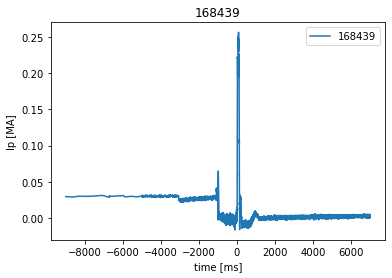

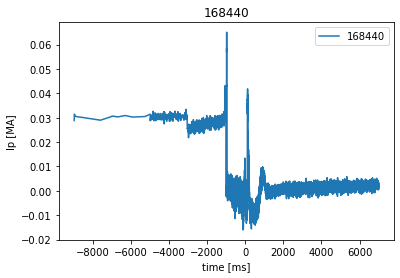

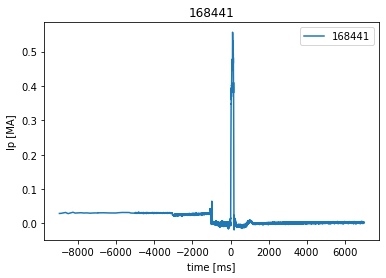

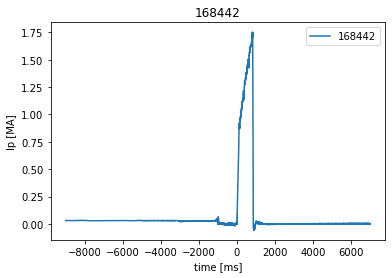

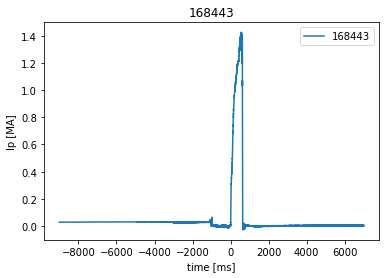

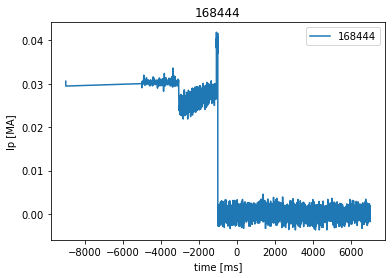

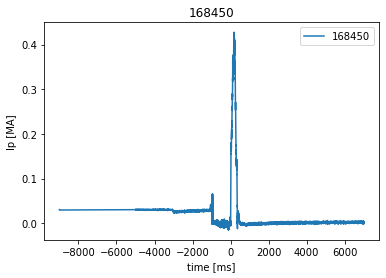

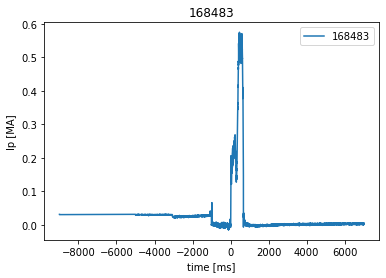

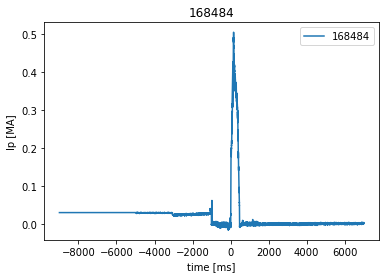

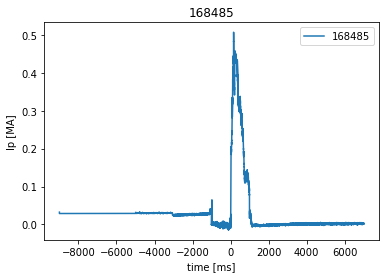

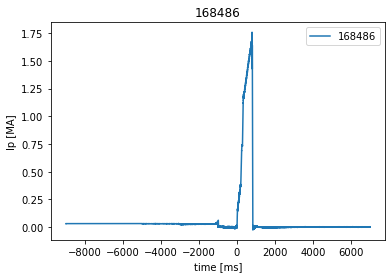

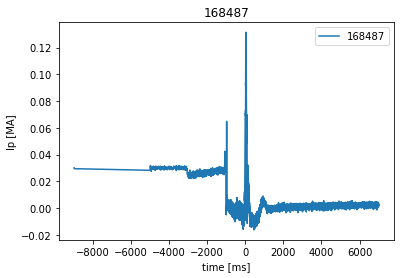

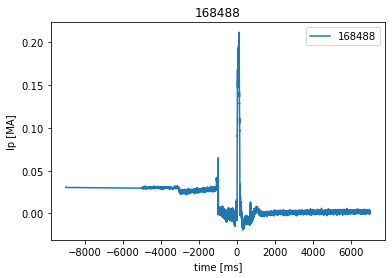

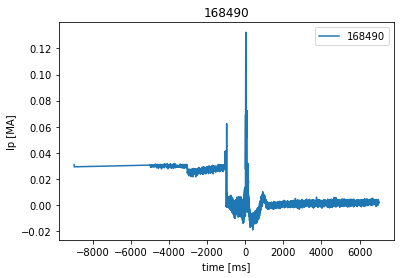

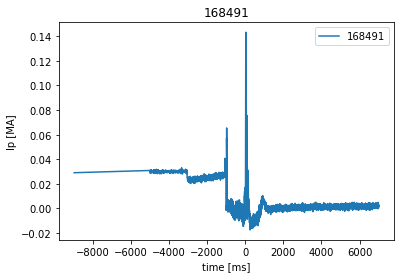

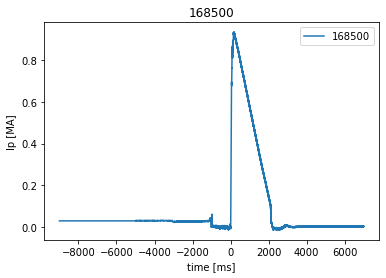

In [15]:
for shotnr in bad_shot_list:
    print(shotnr)

    with h5py.File(join(root, f"{shotnr}.h5"), "r") as fp:
        tb = fp[signal_ip.info["LocalPath"]]["tb"][:]
        data = fp[signal_ip.info["LocalPath"]]["zdata"][:]
    
    plt.figure()
    plt.title(f"{shotnr}")
    plt.plot(tb, data, label=f"{shotnr}")
    
    plt.legend(loc="upper right")
    plt.xlabel("time [ms]")
    plt.ylabel("Ip [MA]")